In [1]:
import import_ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import pydotplus

import matplotlib as mpl
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

from traffic_common import get_category_age, get_category_season, get_category_time, drop_features, cleansing, \
                            encode_features, conv2XYarr, transform_dataframe, bar_chart, pie_chart

In [12]:
traffic_df = pd.read_csv('dataset/seoul_traffic.csv', encoding='euc-kr')

In [13]:
traffic_df.head()

,acc_details,occur_date,occur_time,occur_dayofweek,place_gu,place_dong,acc_type_a,acc_type_b,acc_type_c,offender_violation,road_condition_a,road_condition_b,wheather_status,road_type_a,road_type_b,offender_vehicle,offender_sex,offender_age,offender_injury,victim_vehicle,victim_sex,victim_age,victim_injury
0,경상,20100101,00시,금,마포구,서교동,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,중상,20100101,00시,금,동작구,대방동,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,경상,20100101,00시,금,관악구,신림동,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상
3,경상,20100101,00시,금,강서구,화곡동,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상
4,경상,20100101,00시,금,구로구,구로동,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33세,상해없음,승용차,남,55세,경상


In [14]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362297 entries, 0 to 362296
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   acc_details         362297 non-null  object
 1   occur_date          362297 non-null  int64 
 2   occur_time          362297 non-null  object
 3   occur_dayofweek     362297 non-null  object
 4   place_gu            362297 non-null  object
 5   place_dong          362239 non-null  object
 6   acc_type_a          362297 non-null  object
 7   acc_type_b          362297 non-null  object
 8   acc_type_c          362297 non-null  object
 9   offender_violation  362296 non-null  object
 10  road_condition_a    362297 non-null  object
 11  road_condition_b    362297 non-null  object
 12  wheather_status     362297 non-null  object
 13  road_type_a         362297 non-null  object
 14  road_type_b         362297 non-null  object
 15  offender_vehicle    362297 non-null  object
 16  of

In [15]:
traffic_df['occur_date'].value_counts()

20100910    200
20151107    193
20110430    187
20141128    182
20101002    179
           ... 
20150219     41
20100105     41
20180217     38
20140131     33
20100104     33
Name: occur_date, Length: 3287, dtype: int64

In [16]:
traffic_df['occur_time'].value_counts()

18시    20398
19시    19844
22시    18781
17시    18584
20시    18541
23시    18375
16시    18284
21시    17973
15시    17767
08시    17103
14시    16581
00시    15814
13시    15581
09시    15292
12시    14653
11시    14604
10시    14470
01시    13365
07시    11520
02시    10539
06시     9219
05시     8708
03시     8374
04시     7927
Name: occur_time, dtype: int64

In [17]:
traffic_df['occur_dayofweek'].value_counts()

금    57455
토    55782
수    53054
목    52918
화    51703
월    49635
일    41750
Name: occur_dayofweek, dtype: int64

In [18]:
traffic_df['place_gu'].value_counts()

강남구     32916
송파구     23955
영등포구    20836
서초구     19874
동대문구    16863
강서구     15754
마포구     15516
중랑구     15414
관악구     14354
성북구     14234
노원구     13935
구로구     13657
양천구     12991
강동구     12798
중구      12248
용산구     11970
동작구     11891
종로구     11856
광진구     11699
은평구     11662
강북구     11009
성동구     10071
서대문구     9717
금천구      8702
도봉구      8375
Name: place_gu, dtype: int64

In [19]:
traffic_df['acc_details'].value_counts()

경상      218194
중상      114993
부상신고     25743
사망        3367
Name: acc_details, dtype: int64

In [20]:
traffic_df['acc_type_a'].value_counts()

차대차      253474
차대사람      96573
차량단독      12249
철길건널목         1
Name: acc_type_a, dtype: int64

In [21]:
traffic_df['acc_type_b'].value_counts()

측면충돌          106496
기타            105731
추돌             73973
횡단중            37860
정면충돌           11863
차도통행중           8546
길가장자리구역통행중      6845
보도통행중           5357
공작물충돌           3319
전도전복            1114
후진중충돌            711
전도               266
도로이탈             144
주/정차차량 충돌         55
전복                17
Name: acc_type_b, dtype: int64

In [22]:
traffic_df['offender_violation'].value_counts()

안전운전 의무 불이행    200981
안전거리 미확보        49971
신호위반            43787
기타              27765
교차로 통행방법 위반     13949
중앙선 침범          13165
보행자 보호의무 위반     12050
과속                628
Name: offender_violation, dtype: int64

In [23]:
traffic_df['road_condition_b'].value_counts()

건조       314686
젖음/습기     37257
기타         6404
서리/결빙      2604
적설         1340
침수            4
해빙            2
Name: road_condition_b, dtype: int64

In [24]:
traffic_df['wheather_status'].value_counts()

맑음       310820
비         26420
흐림        18935
기타/불명      3514
눈          2524
안개           84
Name: wheather_status, dtype: int64

In [25]:
traffic_df['road_type_a'].value_counts()

단일로      208954
교차로      141515
기타/불명      7882
기타         3840
불명          105
철길건널목         1
Name: road_type_a, dtype: int64

In [26]:
traffic_df['road_type_b'].value_counts()

기타단일로        182536
교차로내          79823
교차로부근         58812
횡단보도상         13396
기타/불명          7882
횡단보도부근         6859
기타             3840
교량위            3484
교차로횡단보도내       2880
터널안             999
고가도로위           919
지하차도(도로)내       761
불명              105
철길건널목             1
Name: road_type_b, dtype: int64

In [27]:
traffic_df['offender_vehicle'].value_counts()

승용차          247092
이륜차           27673
화물차           27316
승합차           26330
자전거           14294
원동기장치자전거      11632
불명             5410
건설기계           1693
특수차             609
기타              123
개인형이동수단PM        79
농기계              27
사륜오토바이ATV        19
Name: offender_vehicle, dtype: int64

In [28]:
traffic_df['offender_sex'].value_counts()

남       300953
여        50187
기타불명     11157
Name: offender_sex, dtype: int64

In [29]:
traffic_df['offender_age'].value_counts()

불명      10950
55세      9495
53세      9472
54세      9433
56세      9415
52세      9243
57세      9093
51세      8964
50세      8857
58세      8721
49세      8545
48세      8317
59세      8256
47세      8004
60세      7670
45세      7635
46세      7596
44세      7259
61세      7232
43세      7059
42세      6813
62세      6654
41세      6625
30세      6414
33세      6318
31세      6253
29세      6247
40세      6245
32세      6234
39세      6212
63세      6127
36세      6113
34세      6054
35세      6020
37세      5956
38세      5906
28세      5803
27세      5587
64세      5526
26세      5161
65세      4845
25세      4565
66세      4382
24세      4140
67세      4056
23세      3672
68세      3655
22세      3319
17세      3313
69세      3141
16세      3093
70세      2784
18세      2650
19세      2407
21세      2317
71세      2315
20세      1885
72세      1860
73세      1711
74세      1335
75세      1095
76세       904
15세       804
77세       619
14세       538
78세       497
13세       431
79세       363
12세       345
80세       284
11세       193
81세   

In [30]:
traffic_df['victim_vehicle'].value_counts()

승용차          156827
보행자           96574
이륜차           35673
자전거           17800
승합차           15533
원동기장치자전거      14495
없음            12192
화물차           11684
건설기계            575
불명              423
특수차             321
기타               98
개인형이동수단PM        61
농기계              22
사륜오토바이ATV        18
열차                1
Name: victim_vehicle, dtype: int64

In [31]:
traffic_df['victim_sex'].value_counts()

남       261517
여        87545
없음       12192
기타불명      1043
Name: victim_sex, dtype: int64

In [32]:
traffic_df['victim_age'].value_counts()

불명      13245
52세      8162
54세      8132
55세      8102
53세      8063
51세      7960
50세      7810
56세      7617
49세      7582
47세      7420
57세      7400
48세      7389
45세      7269
46세      7166
58세      7068
44세      7049
31세      6972
43세      6906
33세      6875
32세      6868
42세      6862
34세      6849
30세      6810
35세      6721
36세      6632
41세      6572
29세      6554
40세      6548
59세      6514
37세      6508
39세      6416
38세      6332
28세      6306
60세      6067
27세      5967
61세      5714
26세      5552
25세      5151
62세      5135
24세      4742
63세      4704
23세      4427
64세      4379
65세      3843
17세      3843
22세      3802
18세      3536
66세      3426
16세      3257
19세      3137
67세      3106
68세      3010
21세      2912
69세      2675
20세      2592
70세      2440
71세      2166
72세      2045
73세      1740
74세      1568
75세      1472
15세      1358
76세      1260
14세      1167
13세      1142
12세      1096
77세      1063
8세       1035
9세       1021
7세        975
11세       955
10세   

# Preprocessing

In [33]:
df = transform_dataframe(traffic_df)
df.head()

<ipython-input-6-e79252749caa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acc_details']=df['acc_details'].str.replace("사망","중상")


,acc_details,occur_date,occur_time,occur_dayofweek,acc_type_a,acc_type_b,offender_violation,road_condition_b,wheather_status,road_type_a,road_type_b,offender_vehicle,offender_sex,offender_age,victim_vehicle,victim_sex,victim_age
0,경상,Winter,Dawn,금,차대차,기타,기타,젖음/습기,맑음,단일로,기타단일로,승용차,남,중년,이륜차,남,미성년
1,중상,Winter,Dawn,금,차대차,추돌,안전거리 미확보,서리/결빙,맑음,단일로,기타단일로,승합차,남,중년,승용차,남,장년
2,경상,Winter,Dawn,금,차대차,추돌,기타,서리/결빙,흐림,단일로,기타단일로,승용차,남,중년,승용차,남,중년
3,경상,Winter,Dawn,금,차대차,기타,안전거리 미확보,건조,맑음,교차로,교차로부근,승용차,남,중년,승용차,남,중년
4,경상,Winter,Dawn,금,차대차,정면충돌,신호위반,건조,맑음,교차로,교차로내,승용차,남,청년,승용차,남,중년


In [34]:
df['acc_details'].value_counts()

경상    193387
중상    105418
Name: acc_details, dtype: int64

In [35]:
df['occur_date'].value_counts()

Autumn    78545
Summer    75948
Spring    75905
Winter    68407
Name: occur_date, dtype: int64

In [36]:
df['occur_time'].value_counts()

Day      152061
Night     93772
Dawn      52972
Name: occur_time, dtype: int64

In [37]:
df['occur_dayofweek'].value_counts()

금    47497
토    46122
수    43732
목    43672
화    42735
월    40767
일    34280
Name: occur_dayofweek, dtype: int64

In [38]:
df['acc_type_a'].value_counts()

차대차     219269
차대사람     79533
차량단독         3
Name: acc_type_a, dtype: int64

In [39]:
df['acc_type_b'].value_counts()

측면충돌          93841
기타            77542
추돌            66062
횡단중           33684
정면충돌          10444
차도통행중          7261
길가장자리구역통행중     5399
보도통행중          3998
후진중충돌           574
Name: acc_type_b, dtype: int64

In [40]:
df['offender_violation'].value_counts()

안전운전 의무 불이행    158966
안전거리 미확보        44245
신호위반            39416
기타              21288
교차로 통행방법 위반     12384
중앙선 침범          11297
보행자 보호의무 위반     10754
과속                455
Name: offender_violation, dtype: int64

In [41]:
df['road_condition_b'].value_counts()

건조       264085
젖음/습기     31596
서리/결빙      2041
적설         1083
Name: road_condition_b, dtype: int64

In [42]:
df['wheather_status'].value_counts()

맑음    258349
비      22294
흐림     16084
눈       2078
Name: wheather_status, dtype: int64

In [43]:
df['road_type_b'].value_counts()

기타단일로        151963
교차로내          70541
교차로부근         50830
횡단보도상         11889
횡단보도부근         6037
교량위            2916
교차로횡단보도내       2508
터널안             773
고가도로위           755
지하차도(도로)내       593
Name: road_type_b, dtype: int64

In [44]:
df['offender_vehicle'].value_counts()

승용차         215661
화물차          24215
이륜차          19822
승합차          19772
자전거           9037
원동기장치자전거      8251
건설기계          1530
특수차            517
Name: offender_vehicle, dtype: int64

In [45]:
df['offender_sex'].value_counts()

남    254924
여     43881
Name: offender_sex, dtype: int64

In [46]:
df['offender_age'].value_counts()

중년     106285
장년      89769
청년      62835
노년      29492
미성년     10424
Name: offender_age, dtype: int64

In [47]:
df['victim_vehicle'].value_counts()

승용차         137014
보행자          79534
이륜차          31428
자전거          14368
승합차          13235
원동기장치자전거     12696
화물차           9781
건설기계           472
특수차            277
Name: victim_vehicle, dtype: int64

In [48]:
df['victim_sex'].value_counts()

남    224221
여     74584
Name: victim_sex, dtype: int64

In [49]:
df['victim_age'].value_counts()

장년     89212
중년     88565
청년     70421
노년     30171
미성년    20436
Name: victim_age, dtype: int64

# Visualization

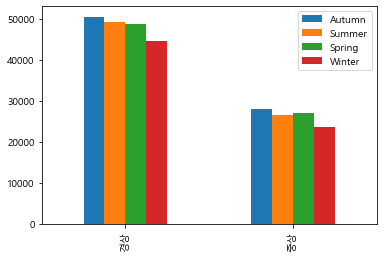

In [50]:
bar_chart(df, 'occur_date')

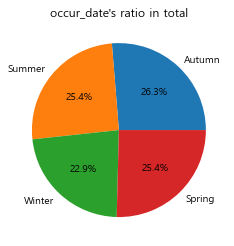

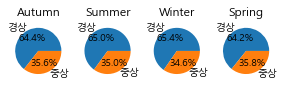

In [51]:
pie_chart(df, 'occur_date')

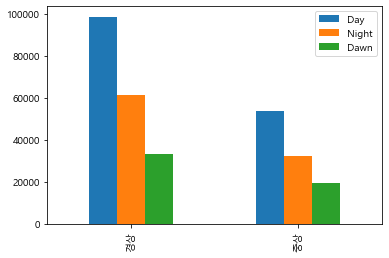

In [52]:
bar_chart(df, 'occur_time')

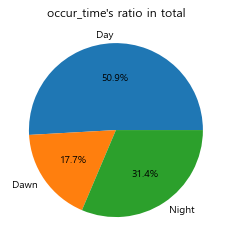

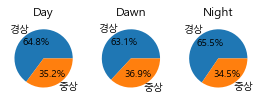

In [53]:
pie_chart(df, 'occur_time')

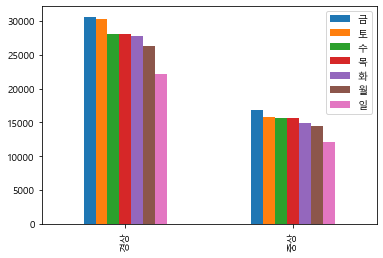

In [54]:
bar_chart(df, 'occur_dayofweek')

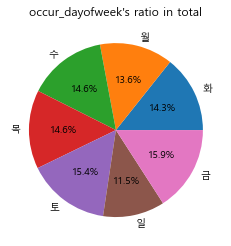

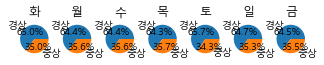

In [55]:
pie_chart(df, 'occur_dayofweek')

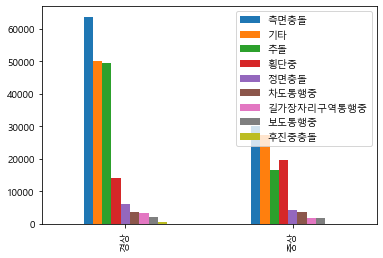

In [56]:
bar_chart(df, 'acc_type_b')

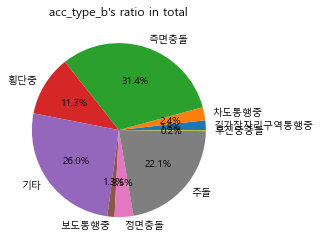

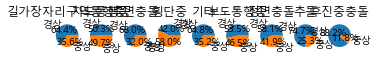

In [57]:
pie_chart(df, 'acc_type_b')

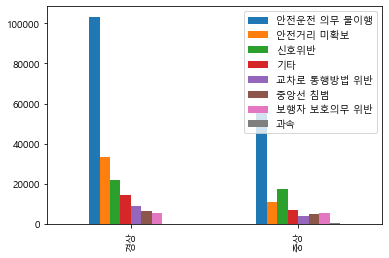

In [58]:
bar_chart(df, 'offender_violation')

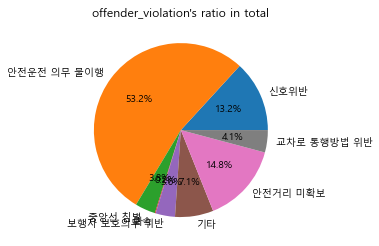

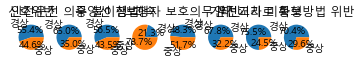

In [59]:
pie_chart(df, 'offender_violation')

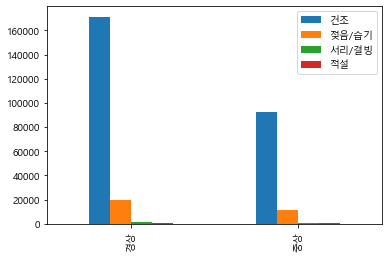

In [60]:
bar_chart(df, 'road_condition_b')

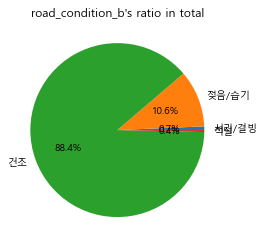

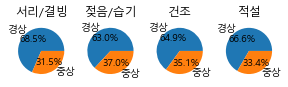

In [61]:
pie_chart(df, 'road_condition_b')

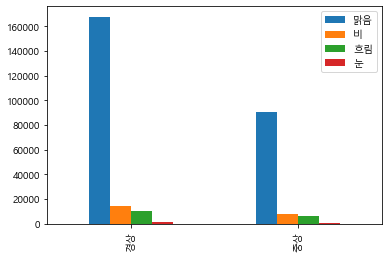

In [62]:
bar_chart(df, 'wheather_status')

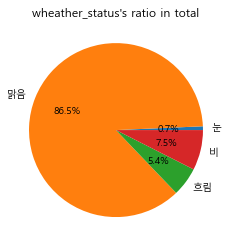

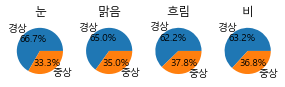

In [63]:
pie_chart(df, 'wheather_status')

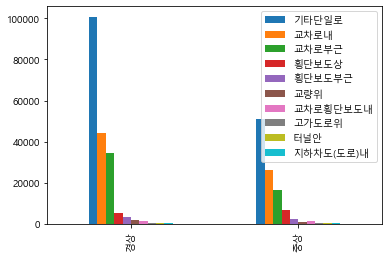

In [64]:
bar_chart(df, 'road_type_b')

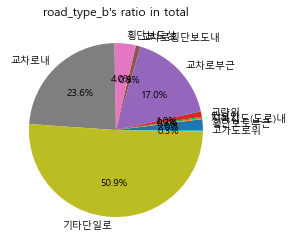

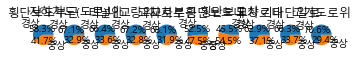

In [65]:
pie_chart(df, 'road_type_b')

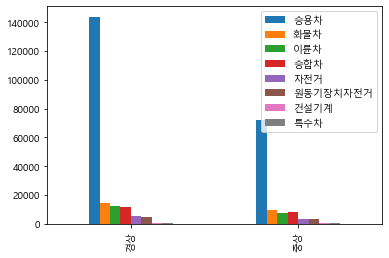

In [66]:
bar_chart(df, 'offender_vehicle')

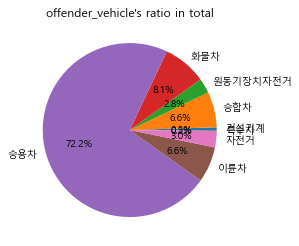

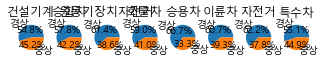

In [67]:
pie_chart(df, 'offender_vehicle')

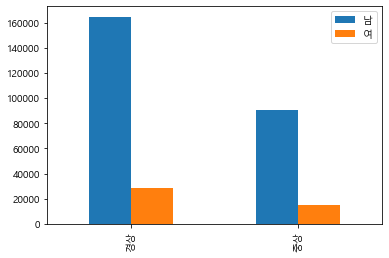

In [68]:
bar_chart(df, 'offender_sex')

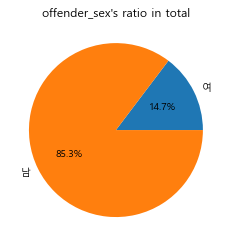

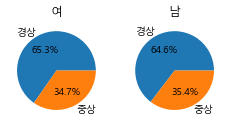

In [69]:
pie_chart(df, 'offender_sex')

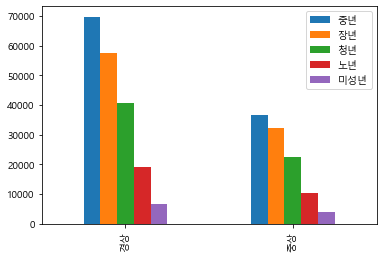

In [70]:
bar_chart(df, 'offender_age')

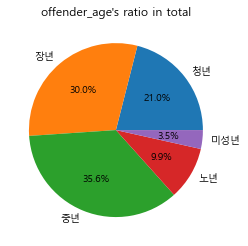

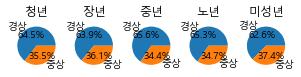

In [71]:
pie_chart(df, 'offender_age')

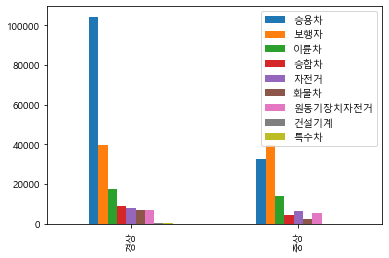

In [72]:
bar_chart(df, 'victim_vehicle')

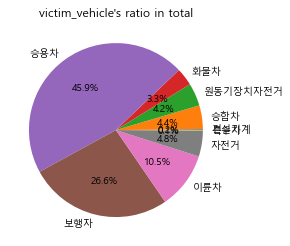

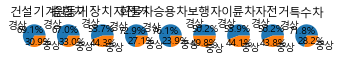

In [73]:
pie_chart(df, 'victim_vehicle')

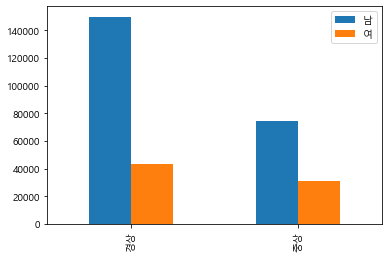

In [74]:
bar_chart(df, 'victim_sex')

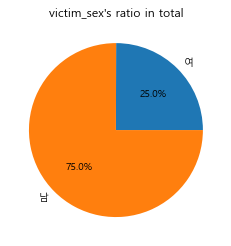

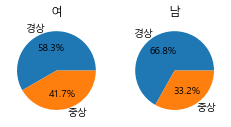

In [75]:
pie_chart(df, 'victim_sex')

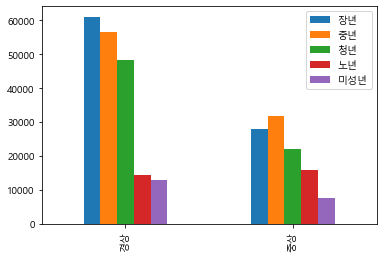

In [76]:
bar_chart(df, 'victim_age')

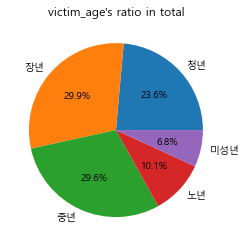

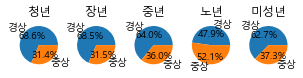

In [77]:
pie_chart(df, 'victim_age')

# one-hot encoding

In [78]:
X,Y,oh_df = conv2XYarr(df)
oh_df.head()

,acc_details_경상,acc_details_중상,occur_date_Autumn,occur_date_Spring,occur_date_Summer,occur_date_Winter,occur_time_Dawn,occur_time_Day,occur_time_Night,occur_dayofweek_금,occur_dayofweek_목,occur_dayofweek_수,occur_dayofweek_월,occur_dayofweek_일,occur_dayofweek_토,occur_dayofweek_화,acc_type_a_차대사람,acc_type_a_차대차,acc_type_a_차량단독,acc_type_b_기타,acc_type_b_길가장자리구역통행중,acc_type_b_보도통행중,acc_type_b_정면충돌,acc_type_b_차도통행중,acc_type_b_추돌,acc_type_b_측면충돌,acc_type_b_횡단중,acc_type_b_후진중충돌,offender_violation_과속,offender_violation_교차로 통행방법 위반,offender_violation_기타,offender_violation_보행자 보호의무 위반,offender_violation_신호위반,offender_violation_안전거리 미확보,offender_violation_안전운전 의무 불이행,offender_violation_중앙선 침범,road_condition_b_건조,road_condition_b_서리/결빙,road_condition_b_적설,road_condition_b_젖음/습기,wheather_status_눈,wheather_status_맑음,wheather_status_비,wheather_status_흐림,road_type_a_교차로,road_type_a_단일로,road_type_b_고가도로위,road_type_b_교량위,road_type_b_교차로내,road_type_b_교차로부근,road_type_b_교차로횡단보도내,road_type_b_기타단일로,road_type_b_지하차도(도로)내,road_type_b_터널안,road_type_b_횡단보도부근,road_type_b_횡단보도상,offender_vehicle_건설기계,offender_vehicle_승용차,offender_vehicle_승합차,offender_vehicle_원동기장치자전거,offender_vehicle_이륜차,offender_vehicle_자전거,offender_vehicle_특수차,offender_vehicle_화물차,offender_sex_남,offender_sex_여,offender_age_노년,offender_age_미성년,offender_age_장년,offender_age_중년,offender_age_청년,victim_vehicle_건설기계,victim_vehicle_보행자,victim_vehicle_승용차,victim_vehicle_승합차,victim_vehicle_원동기장치자전거,victim_vehicle_이륜차,victim_vehicle_자전거,victim_vehicle_특수차,victim_vehicle_화물차,victim_sex_남,victim_sex_여,victim_age_노년,victim_age_미성년,victim_age_장년,victim_age_중년,victim_age_청년
0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [79]:
feature_names = oh_df.columns[2:]
target_names = ['light','serious']

In [80]:
print('컬럼 순서')
order_columns_df = pd.DataFrame(data=feature_names, columns=['컬럼 순서'])
order_columns_df.head(150)

컬럼 순서


,컬럼 순서
0,occur_date_Autumn
1,occur_date_Spring
2,occur_date_Summer
3,occur_date_Winter
4,occur_time_Dawn
5,occur_time_Day
6,occur_time_Night
7,occur_dayofweek_금
8,occur_dayofweek_목
9,occur_dayofweek_수


## Decision Tree (tuning Hyperparameters)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 

In [82]:
dt_clf = DecisionTreeClassifier(random_state=156)

parameters = {'max_depth': [4],
              'min_samples_split': [30, 100, 2000, 5000, 10000],
              'min_samples_leaf': [30, 100, 2000, 5000, 10000], 
             'criterion':['gini']}

grid_dt = GridSearchCV(dt_clf,
                      param_grid = parameters, cv = 5,
                      n_jobs = -1)

grid_dt.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_dt.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_dt.best_score_))

최적 하이퍼 파라미터:
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 30}
최고 예측 정확도: 0.6754


## Decision Tree (using KFold)

In [83]:
best_dt_clf = grid_dt.best_estimator_

kfold = KFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    best_dt_clf.fit(X_train, y_train)
    pred = best_dt_clf.predict(X_test)
    n_iter+=1
    
    accuracy=np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    cv_accuracy.append(accuracy)

print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.646, 학습 데이터 크기: 239044, 검증 데이터 크기: 59761

#2 교차 검증 정확도 :0.6624, 학습 데이터 크기: 239044, 검증 데이터 크기: 59761

#3 교차 검증 정확도 :0.6629, 학습 데이터 크기: 239044, 검증 데이터 크기: 59761

#4 교차 검증 정확도 :0.6815, 학습 데이터 크기: 239044, 검증 데이터 크기: 59761

#5 교차 검증 정확도 :0.7062, 학습 데이터 크기: 239044, 검증 데이터 크기: 59761
## 평균 검증 정확도: 0.6718


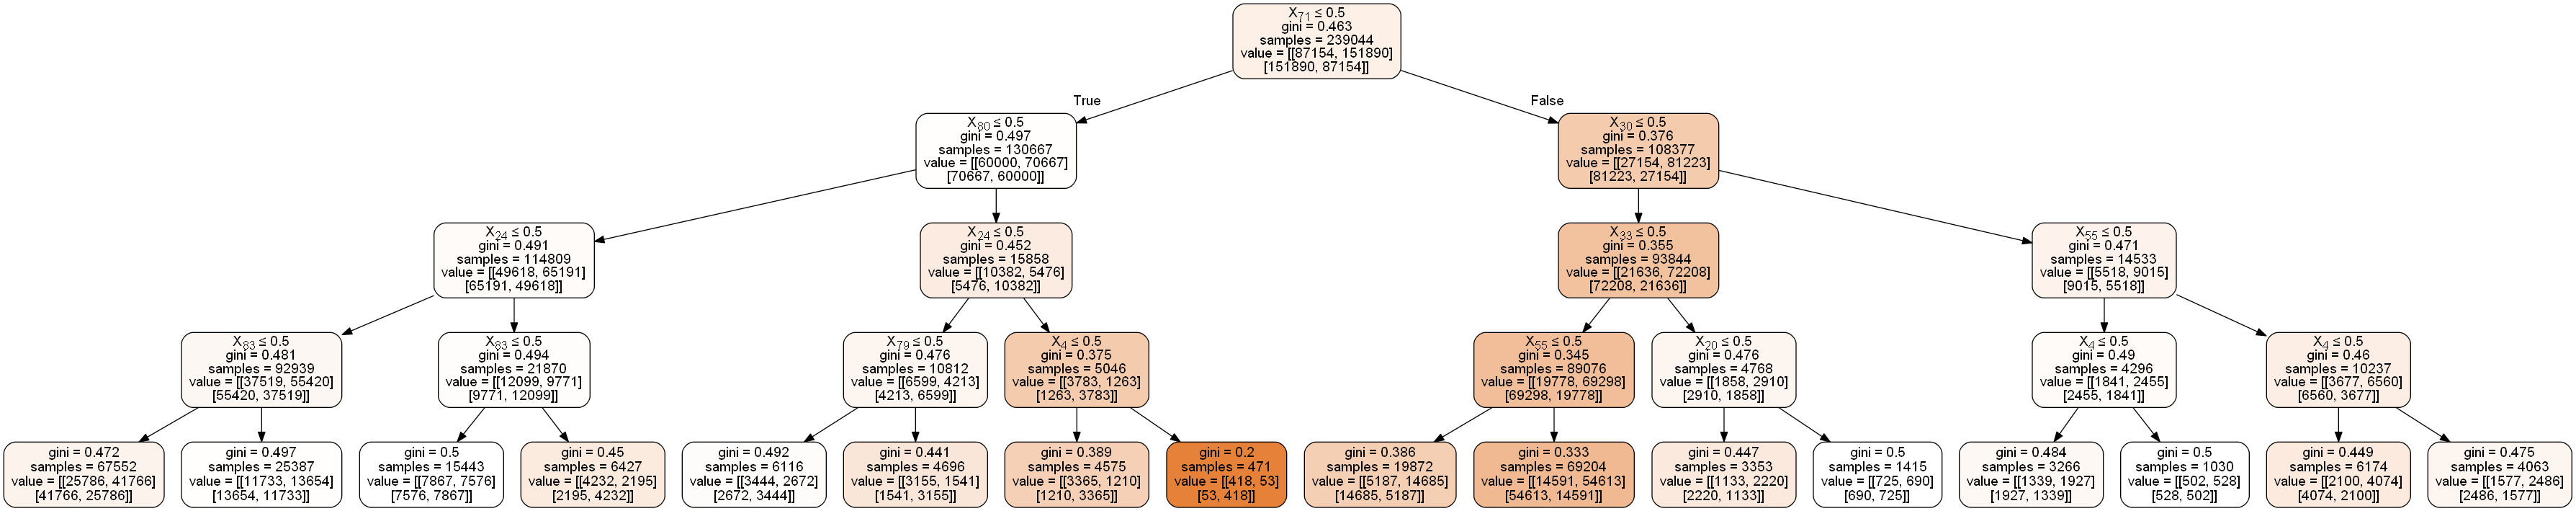

In [84]:
dt_dot_data = export_graphviz(best_dt_clf, out_file = None,
                                  feature_names = None,
                                  class_names = target_names,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())